In [47]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Amazon Customer Behavior Survey.csv',encoding='CP949')
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
import statsmodels.formula.api as smf

In [49]:
# 결측지 확인 및 제거
print(df.isnull().sum())
df.dropna(inplace=True)

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [50]:
df.dtypes

Timestamp                                 object
age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Frequency     object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                object
Rating_Accuracy                            int64
Shopping_Satisfactio

In [51]:
le = LabelEncoder()
lst = ['Gender','Purchase_Frequency','Personalized_Recommendation_Frequency',
       'Browsing_Frequency','Product_Search_Method','Search_Result_Exploration','Add_to_Cart_Browsing',
       'Cart_Completion_Frequency','Cart_Abandonment_Factors','Saveforlater_Frequency','Recommendation_Helpfulness',
       'Review_Left','Review_Reliability','Review_Helpfulness','Service_Appreciation','Improvement_Areas']
for i in lst:
  df[i]=le.fit_transform(df[i])
  print(le.classes_)

df.rename(columns={'Rating_Accuracy ':'Rating_Accuracy'},inplace=True)
df.dtypes

['Female' 'Male' 'Others' 'Prefer not to say']
['Few times a month' 'Less than once a month' 'Multiple times a week'
 'Once a month' 'Once a week']
['No' 'Sometimes' 'Yes']
['Few times a month' 'Few times a week' 'Multiple times a day' 'Rarely']
['Filter' 'Keyword' 'categories' 'others']
['First page' 'Multiple pages']
['Maybe' 'No' 'Yes']
['Always' 'Never' 'Often' 'Rarely' 'Sometimes']
['Changed my mind or no longer need the item'
 'Found a better price elsewhere' 'High shipping costs' 'others']
['Always' 'Never' 'Often' 'Rarely' 'Sometimes']
['No' 'Sometimes' 'Yes']
['No' 'Yes']
['Heavily' 'Moderately' 'Never' 'Occasionally' 'Rarely']
['No' 'Sometimes' 'Yes']
['.' 'All the above' 'Competitive prices' 'Customer service'
 'Customer service ' 'Product recommendations' 'Quick delivery'
 'User-friendly website/app interface' 'Wide product selection']
['.' 'Add more familiar brands to the list'
 'Customer service responsiveness' "I don't have any problem with Amazon"
 'I have no problem wi

Timestamp                                 object
age                                        int64
Gender                                     int64
Purchase_Frequency                         int64
Purchase_Categories                       object
Personalized_Recommendation_Frequency      int64
Browsing_Frequency                         int64
Product_Search_Method                      int64
Search_Result_Exploration                  int64
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                       int64
Cart_Completion_Frequency                  int64
Cart_Abandonment_Factors                   int64
Saveforlater_Frequency                     int64
Review_Left                                int64
Review_Reliability                         int64
Review_Helpfulness                         int64
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                 int64
Rating_Accuracy                            int64
Shopping_Satisfactio

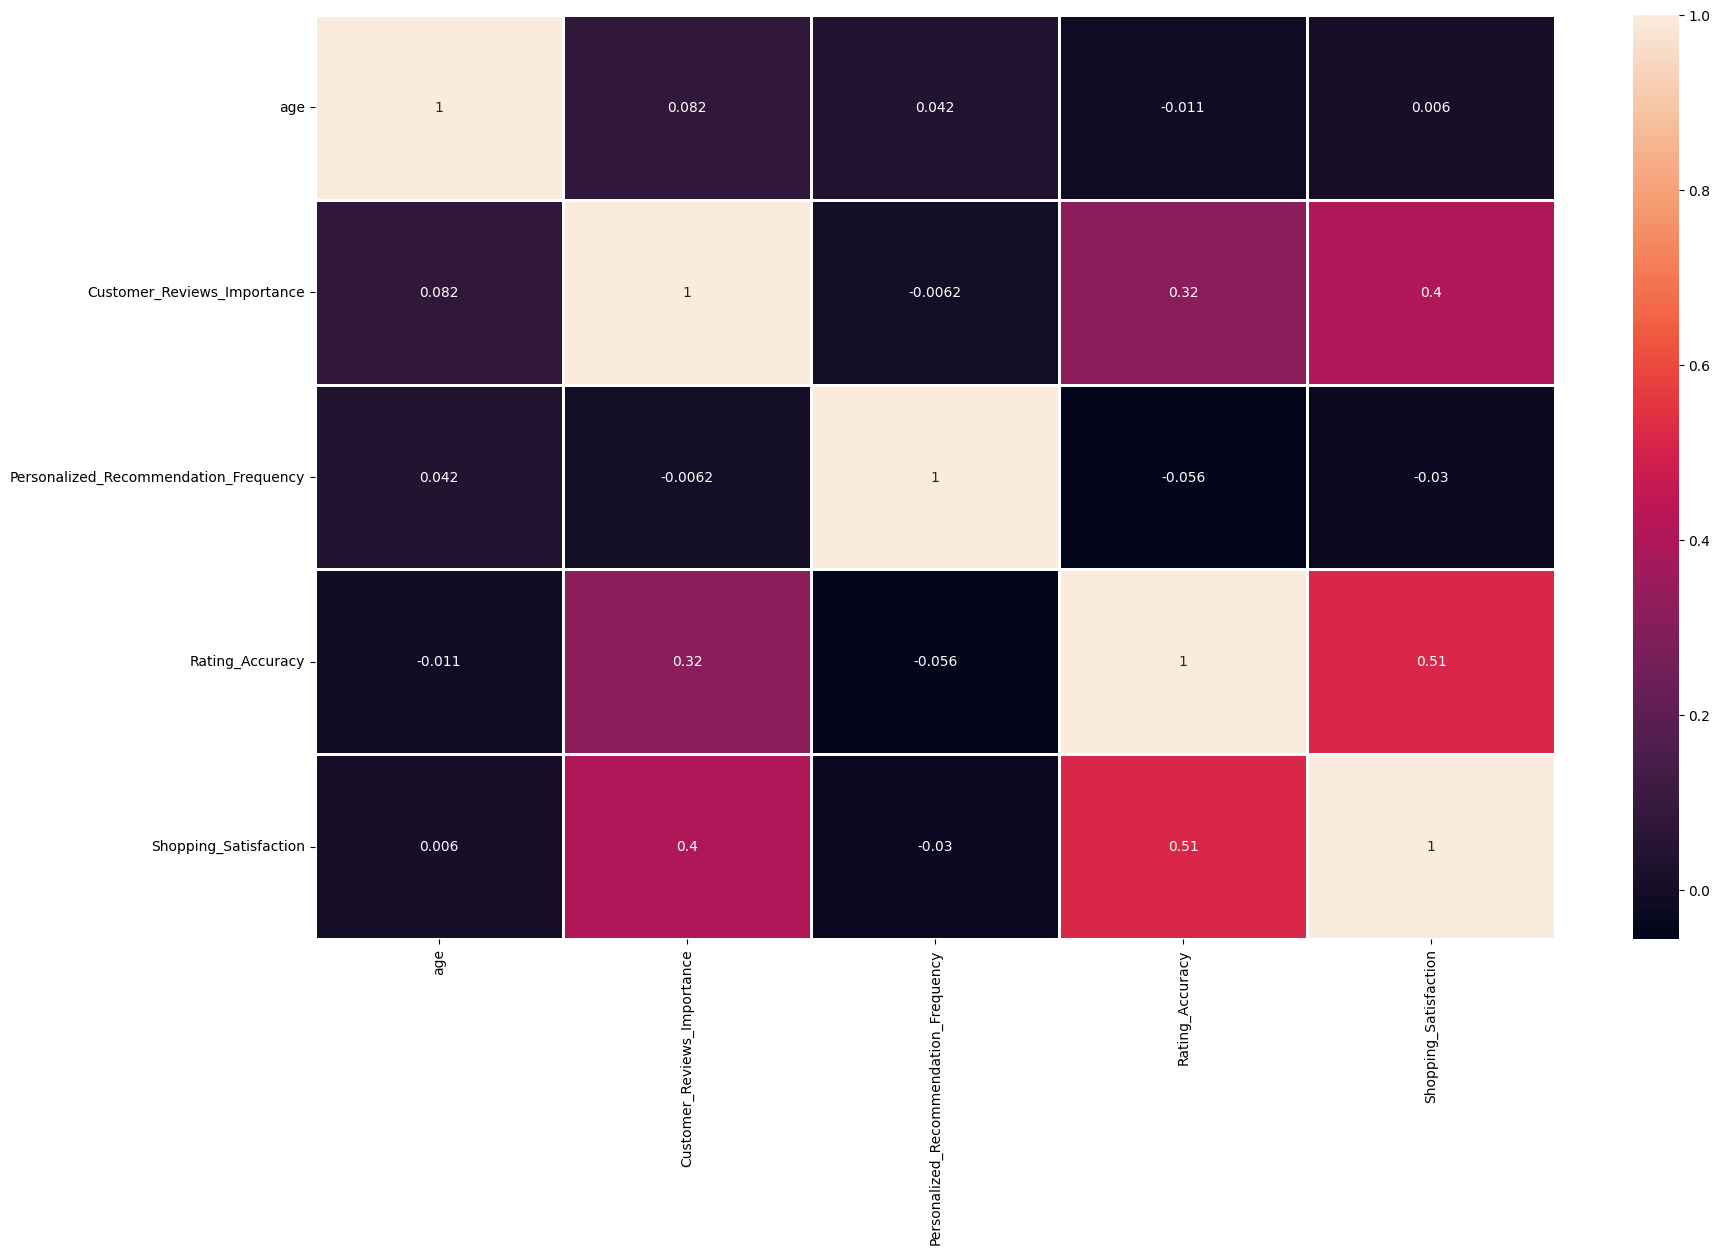

In [52]:
# 피어슨 상관관계 분석
df1 = df[['age','Customer_Reviews_Importance','Personalized_Recommendation_Frequency',
          'Rating_Accuracy','Shopping_Satisfaction']]
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(df1.corr(method='pearson'),annot=True,linewidths=1)
plt.show()

피어슨 상관관계 분석 이용한 결과 shopping_satisfaction과 Rating_Accuracy(0.51)외 나머지 변수들간의 상관계수 관계가 낮음

즉, 추천 관련성과 정확도가 높을 수 아마존에서의 쇼핑 만족도는 올라간다.

In [53]:
#범주형 변수간의 독립성 검정(카이제곱 검정 이용)
#구매빈도(Purchase_Frequency)와 브라우징 빈도(Browsing_Frequency)
#자주 활동하는 고객과 가끔 활동하는 고객
X=pd.crosstab(df.Purchase_Frequency, df.Browsing_Frequency, margins=False)
print(stats.chi2_contingency(X))

#제품 검색 방법(Product_Search_Method)과 검색 결과 탐색(Search_Result_Exploration)
#효과적으로 검색하는 고객과 비효과적으로 검색하는 고객
X=pd.crosstab(df.Product_Search_Method, df.Search_Result_Exploration, margins=False)
print(stats.chi2_contingency(X))

#장바구니 완료 빈도(Cart_Completion_Frequency)와 장바구니 포기 요인(Cart_Abandonment_Factors)
#쉽게 구매 결정을 내리는 고객과 구매 결정을 주저하는 고객
X=pd.crosstab(df.Cart_Completion_Frequency, df.Cart_Abandonment_Factors, margins=False)
print(stats.chi2_contingency(X))

Chi2ContingencyResult(statistic=134.20964366142388, pvalue=8.798687773268324e-23, dof=12, expected_freq=array([[66.99666667, 83.49333333, 25.58666667, 25.92333333],
       [41.12666667, 51.25333333, 15.70666667, 15.91333333],
       [18.57333333, 23.14666667,  7.09333333,  7.18666667],
       [35.15666667, 43.81333333, 13.42666667, 13.60333333],
       [37.14666667, 46.29333333, 14.18666667, 14.37333333]]))
Chi2ContingencyResult(statistic=42.39224716974357, pvalue=3.3122898198360474e-09, dof=3, expected_freq=array([[ 33.86666667,  93.13333333],
       [ 57.06666667, 156.93333333],
       [ 59.46666667, 163.53333333],
       [  9.6       ,  26.4       ]]))
Chi2ContingencyResult(statistic=100.09509384545369, pvalue=5.333976078862574e-16, dof=12, expected_freq=array([[ 18.4       ,  19.47333333,   5.36666667,   2.76      ],
       [  8.4       ,   8.89      ,   2.45      ,   1.26      ],
       [ 63.2       ,  66.88666667,  18.43333333,   9.48      ],
       [ 28.8       ,  30.48      ,  

카이제곱 통계량 값이 큰것을 보아 구매빈도와 브라우징 빈도, 제품 검색 방법과 검색 결과 탐색, 장바구니 완료 빈도와 장바구니 포기 요인이 모두 연관성이 있다.

In [54]:
df['Purchase_Categories'] = df['Purchase_Categories'].astype(str)
categories_split = df['Purchase_Categories'].str.split(';')

BeautyandPersonalCare = 0
ClothingandFashion = 0
HomeandKitchen = 0
GroceriesAndGourmetFood = 0
others = 0

for i in range(len(df['Purchase_Categories'])):
  try:
    for j in range(len(categories_split[i])):
      if categories_split[i][j] == 'Beauty and Personal Care':
        BeautyandPersonalCare += 1
      if categories_split[i][j] == 'Clothing and Fashion':
        ClothingandFashion += 1
      if categories_split[i][j] == 'Home and Kitchen':
        HomeandKitchen += 1
      if categories_split[i][j] == 'Groceries and Gourmet Food':
        GroceriesAndGourmetFood += 1
      if categories_split[i][j] == 'others':
        others += 1
  except KeyError as e:
    print(f'KeyError occurred at index {i}: {e}\n')

print('Beauty and Personal Care:', BeautyandPersonalCare,'\nClothing and Fashion:', ClothingandFashion,
      '\nHome and Kitchen', HomeandKitchen,'\nGroceries and Gourmet Food:', GroceriesAndGourmetFood,'\nothers:', others)

KeyError occurred at index 119: 119

KeyError occurred at index 382: 382

Beauty and Personal Care: 316 
Clothing and Fashion: 339 
Home and Kitchen 219 
Groceries and Gourmet Food: 111 
others: 164


In [56]:
values = [0,1,2,3,4]
counts = [165, 178, 115, 58, 86]

data = []
for v, c in zip(values, counts):
    data.extend([v] * c)

data = pd.DataFrame(data, columns=['categories'])
print(data)

     categories
0             0
1             0
2             0
3             0
4             0
..          ...
597           4
598           4
599           4
600           4
601           4

[602 rows x 1 columns]


In [58]:
#더미변수를 이용한 회귀분석
#각각의 Purchase_Categories가 shopping satisfaction에 영향을 미칠까?

#더미변수 생성
df2 = pd.get_dummies(data['categories'], prefix='categories', drop_first=True)
df3 = pd.concat([df,df2],axis=1)
print(df2)
#더미변수를 이용한 회귀분석
Models3 = smf.ols(formula='Shopping_Satisfaction ~ categories_1+categories_2+categories_3+categories_4',
                  data=df3).fit()
Models3.summary()

     categories_1  categories_2  categories_3  categories_4
0               0             0             0             0
1               0             0             0             0
2               0             0             0             0
3               0             0             0             0
4               0             0             0             0
..            ...           ...           ...           ...
597             0             0             0             1
598             0             0             0             1
599             0             0             0             1
600             0             0             0             1
601             0             0             0             1

[602 rows x 4 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Shopping_Satisfaction   R-squared:                       0.056
Model:                               OLS   Adj. R-squared:                  0.050
Method:                    Least Squares   F-statistic:                     8.851
Date:                   Wed, 22 Nov 2023   Prob (F-statistic):           6.03e-07
Time:                           14:41:11   Log-Likelihood:                -841.52
No. Observations:                    600   AIC:                             1693.
Df Residuals:                        595   BIC:                             1715.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.2866      0.077     29.642      0.000       2.135       2.438
categories_1     0.2921      0.107      2.732      0.006       0.082       0.502
categories_2    -0.1375      0.120     -1.141      0.254      -0.374       0.099
categories_3     0.3341      0.151      2.214      0.027       0.038       0.630
categories_4     0.5855      0.132      4.452      0.000       0.327       0.844
==============================================================================
Omnibus:                       10.301   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.623
Skew:                           0.317   Prob(JB):                      0.00493
Kurtosis:                       2.850   Cond. No.                         5.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

어떤 category에 있는 물건을 구매했을 때 사용자의 쇼핑 만족도를 높여줄까..가 궁금해 더미변수를 이용한 회귀분석을 해보았지만 설명력은 약5%, F 통계량 8.8...

그래도 굳이 결론은 내보자면 cateogries_0(Beauty and Personal Care)에 있는 물건을 구매했을 때 쇼핑 만족도에 가장 좋은 영향을 categories_2(Home and Kitchen)에 있는 물건을 구매했을 때 쇼핑 만족도에 가장 안좋은 영향을 끼친다(불량품이 많나??).